# **Saurav Karki** (2357827)


In [206]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Importing the dataset using the syntax read_csv
head() is used to display the first 5 rows in the dataset

In [207]:
dataframe = pd.read_csv("/content/drive/MyDrive/Concept and Technologies of AI/Final_Assingment/penguins_size.csv")
dataframe.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


The code creates a copy of the original DataFrame, drops the "species" and "island" columns, and updates the DataFrame in place. The resulting DataFrame, named `df`, is then displayed to show the first five rows without the excluded columns.

In [208]:
df = dataframe.copy()
df.drop(["species","island"], axis=1, inplace=True)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


This code calculates and prints the number of null values in each column of the DataFrame `df`. It iterates through each column using a for loop, checks for missing values using `pd.isnull()`, sums the missing values for each column, and prints the count. Additionally, the total number of missing values across all columns is accumulated and displayed at the end. This process helps in assessing the extent of missing data in the dataset before any data cleaning operations.

In [209]:


total_missing_values = 0

for col in df.columns:
    miss_check = pd.isnull(df[col]).sum()

    total_missing_values += miss_check

    print(f"Number of null values in '{col}': {miss_check}")

print("Total number of null/missing values in the dataset2 before data cleaning:", total_missing_values)

Number of null values in 'culmen_length_mm': 2
Number of null values in 'culmen_depth_mm': 2
Number of null values in 'flipper_length_mm': 2
Number of null values in 'body_mass_g': 2
Number of null values in 'sex': 10
Total number of null/missing values in the dataset2 before data cleaning: 18


The code calculates the total number of missing values in each column before and after data cleaning in the DataFrame `df`. It uses forward-fill (`method='ffill'`) to fill missing values in `df` based on the previous valid value. The results are printed to compare the total missing values before and after the data cleaning process.

In [210]:
total_missing_before = 0
total_missing_after = 0
for col in df.columns:
  #for missing
  total_missing = pd.isnull(dataframe[col]).sum()   #comparing with dataset
  total_missing_before  += total_missing


  if(df[col].isnull().sum()>0):
      df[col] = df[col].fillna(method='ffill') #fills the value in the null place from above valid value - ffill
      total_missing_after += df[col].isnull().sum()

print("Before :")
print("Total number of null/missing values in the dataset2 before data cleaning:", total_missing_before)
print("After :")
print("Total number of null/missing values in the dataset2 after data cleaning:", total_missing_after)

Before :
Total number of null/missing values in the dataset2 before data cleaning: 18
After :
Total number of null/missing values in the dataset2 after data cleaning: 0


The code creates feature matrix `X` and target vector `y` from the DataFrame `df`. `X` contains all rows and columns except the last one, converted to a NumPy array. `y` is assigned the "sex" column values. The resulting feature matrix `X` and target vector `y` are then printed.

In [211]:

X = df.iloc[ : , : -1].to_numpy()
y = df.sex
print(X)
print(y)

[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  50.4   15.7  222.  5750. ]
 [  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]
0        MALE
1      FEMALE
2      FEMALE
3      FEMALE
4      FEMALE
        ...  
339    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object


The code uses the `train_test_split` function from scikit-learn to split the feature matrix (`X`) and target vector (`y`) into training and testing sets. It assigns 80% of the data to the training set (`X_train` and `y_train`) and 20% to the testing set (`X_test` and `y_test`). The `random_state` parameter ensures reproducibility.

In [212]:
from sklearn.model_selection import train_test_split
# Step 3.1.2: Split the Dataset into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


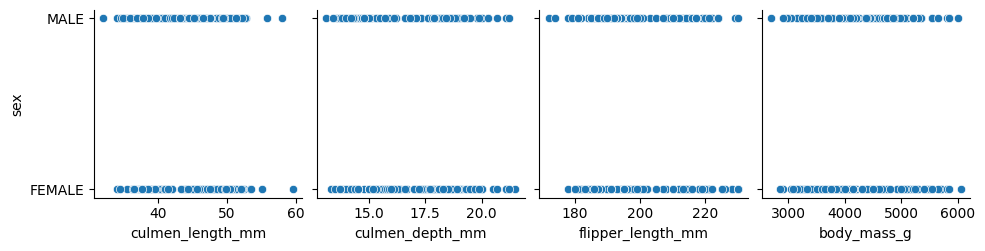

In [213]:
df_X_train = pd.DataFrame(X_train, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# Add the target variable to the DataFrame
df_X_train['sex'] = y_train

# Create pair plots for each feature against the target variable
sns.pairplot(df_X_train, x_vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], y_vars='sex', kind='scatter', markers='o', palette='r')
plt.show()

The code creates a pair plot using the Seaborn library for visualizing relationships between numerical variables in the DataFrame `dataframe`. Each scatterplot represents the relationship between two variables, and histograms along the diagonal show the distribution of each variable. The resulting pair plot is displayed with a specified figure size of 20x10.

[]

<Figure size 2000x1000 with 0 Axes>

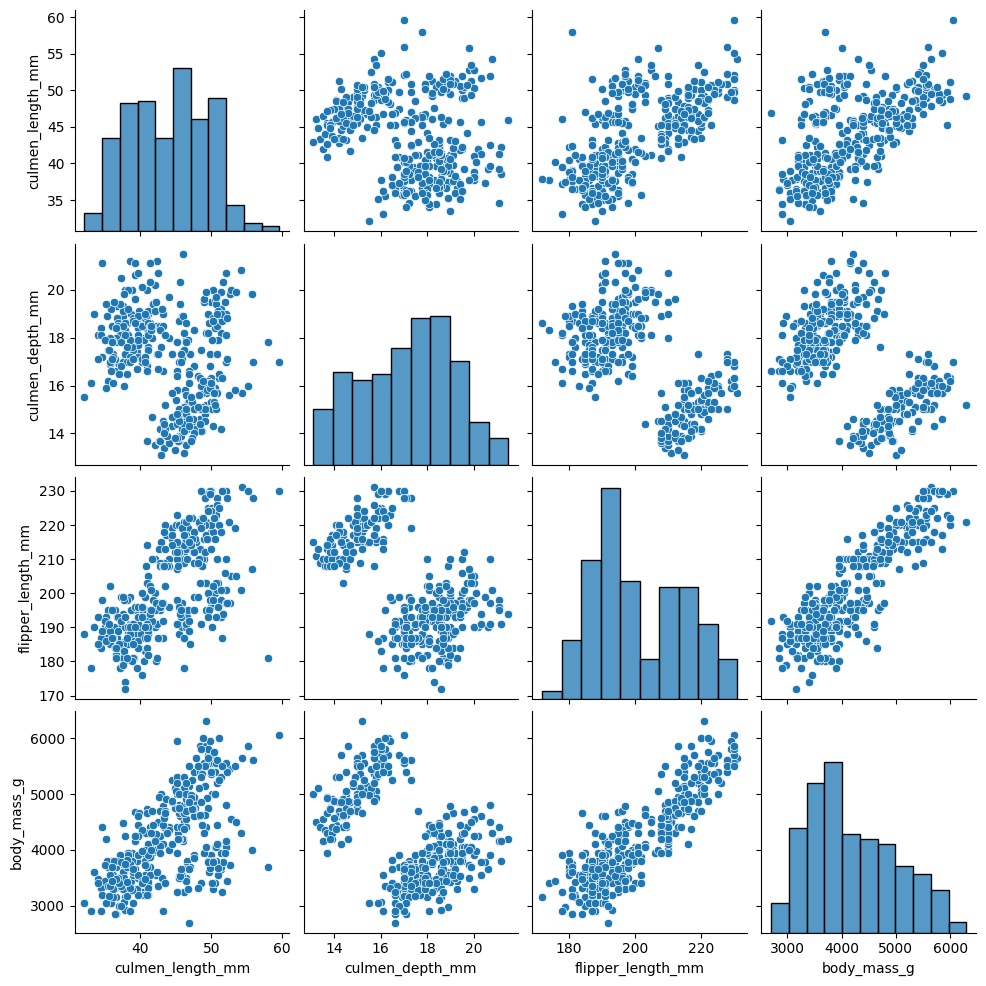

In [214]:
# print(numeric_df)
plt.figure(figsize=(20,10))
sns.pairplot(dataframe)
plt.plot()

In [215]:
print(X_train)

[[  35.5   16.2  195.  3350. ]
 [  46.8   15.4  215.  5150. ]
 [  39.2   19.6  195.  4675. ]
 ...
 [  38.6   17.2  199.  3750. ]
 [  46.6   14.2  210.  4850. ]
 [  37.7   16.   183.  3075. ]]


In [216]:
print(y_train)

66     FEMALE
229      MALE
7        MALE
140    FEMALE
323      MALE
        ...  
188    FEMALE
71       MALE
106    FEMALE
270    FEMALE
102    FEMALE
Name: sex, Length: 275, dtype: object


In [217]:
print("Length of X train : ",len(X_train))
print("Length of X test : ",len(X_test))
print("Length of y train : ",len(y_train))
print("Length of y test : ",len(y_test))

Length of X train :  275
Length of X test :  69
Length of y train :  275
Length of y test :  69


## **Logistic Regression**

### **Model train**

The code fits a Logistic Regression model (`logistic_model`) to the training data (`X_train`, `y_train`) using scikit-learn. The model is configured with a random state for reproducibility and a maximum iteration limit. Predictions are then made on both the training and testing sets (`logistic_pred_train` and `logistic_pred_test`).

In [218]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42, max_iter=5000)
logistic_model.fit(X_train, y_train)
logistic_pred_train = logistic_model.predict(X_train)
logistic_pred_test = logistic_model.predict(X_test)

In [219]:

print(logistic_pred_test)

['MALE' 'MALE' 'FEMALE' 'FEMALE' 'FEMALE' 'MALE' 'MALE' 'FEMALE' 'MALE'
 'FEMALE' 'MALE' 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'MALE' 'MALE' 'MALE' 'MALE' 'MALE' 'MALE' 'MALE' 'FEMALE' 'MALE'
 'MALE' 'FEMALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'FEMALE' 'MALE' 'MALE' 'FEMALE' 'MALE' 'MALE' 'MALE' 'FEMALE'
 'MALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'MALE' 'MALE' 'MALE' 'MALE'
 'FEMALE' 'FEMALE' 'FEMALE' 'MALE' 'MALE' 'MALE' 'MALE' 'MALE' 'MALE'
 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE']


Testing model predection

In [220]:
new_features = np.array([[35.5, 16.2, 195, 335]])
y_pred = logistic_model.predict(new_features)

print(y_pred)

['FEMALE']


## **Random Forest**

### **Model Train**

The code creates and fits a Random Forest Classifier (`rf_model`) to the training data (`X_train`, `y_train`) using scikit-learn. The model is configured with a random state for reproducibility. Predictions are then made on both the training and testing sets (`rf_pred_train` and `rf_pred_test`).

In [221]:
from sklearn.ensemble import RandomForestClassifier

# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

In [222]:
print(rf_pred_test)

['MALE' 'MALE' 'FEMALE' 'FEMALE' 'FEMALE' 'MALE' 'MALE' 'FEMALE' 'MALE'
 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'MALE' 'MALE' 'MALE' 'FEMALE' 'MALE' 'MALE' 'MALE' 'FEMALE' 'MALE'
 'MALE' 'FEMALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'FEMALE' 'MALE' 'MALE' 'FEMALE' 'MALE' 'MALE' 'MALE' 'FEMALE'
 'MALE' 'MALE' 'FEMALE' 'FEMALE' 'FEMALE' 'MALE' 'MALE' 'MALE' 'MALE'
 'MALE' 'FEMALE' 'FEMALE' 'FEMALE' 'MALE' 'MALE' 'MALE' 'MALE' 'MALE'
 'MALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'FEMALE']


## **Model Evaluate**

The code uses scikit-learn's `accuracy_score` function to evaluate the accuracy of predictions for both Logistic Regression and Random Forest models on both the training and testing sets. The results are stored in variables (`logistic_accuracy_train`, `logistic_accuracy_test`, `rf_accuracy_train`, and `rf_accuracy_test`).

In [223]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate both models
logistic_accuracy_train = accuracy_score(y_train, logistic_pred_train)
logistic_accuracy_test = accuracy_score(y_test, logistic_pred_test)

rf_accuracy_train = accuracy_score(y_train, rf_pred_train)
rf_accuracy_test = accuracy_score(y_test, rf_pred_test)

The code creates a DataFrame named `model_result` to store the training and testing accuracies of two models (Logistic Regression and Random Forest). The DataFrame includes columns for the method names, training accuracies, and testing accuracies. The results are populated using the accuracy scores obtained earlier.

In [224]:
model_result = pd.DataFrame({
    "Method": ["Logistic","Random Forest"],
    "Train Accuracy": [logistic_accuracy_train,rf_accuracy_train],
    "Test Accuracy": [logistic_accuracy_test,rf_accuracy_test]
})

In [225]:
model_result

,Method,Train Accuracy,Test Accuracy
0,Logistic,0.894545,0.855072
1,Random Forest,1.000000,0.884058


## **Model Evaluation First**

Comparing which model performs better in initial stage

In [226]:
if(logistic_accuracy_test < rf_accuracy_test):
  print("Random Forest Classifier performs Better")
else:
  print("Logistic Regression performs Better")

Random Forest Classifier performs Better


## **Hyperparameter**

### **Logistic**

The code performs hyperparameter tuning for a Logistic Regression model using GridSearchCV. It explores a range of regularization parameters (`'C'`) and optimization algorithms (`'solver'`). The `GridSearchCV` object (`logistic_grid_search`) searches exhaustively over the specified parameter grid using 5-fold cross-validation. After fitting the model to the training data (`X_train`, `y_train`), it prints the best hyperparameters selected by the grid search.

In [227]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LogisticRegression

# For Logistic Regression
logistic_params = {
    'C': np.logspace(-3, 3, 20),  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

# GridSearchCV will search exhaustively over the entire parameter grid
logistic_grid_search = GridSearchCV(estimator=logistic_model, param_grid=logistic_params, cv=5)
logistic_grid_search.fit(X_train, y_train)

print("Best hyperparameters for Logistic Regression:")
print(logistic_grid_search.best_params_)

Best hyperparameters for Logistic Regression:
{'C': 1.438449888287663, 'solver': 'lbfgs'}


### **Random Forest**

This code performs hyperparameter tuning for a Random Forest Classifier using RandomizedSearchCV. It defines a parameter grid (`rf_params`) including the number of trees (`'n_estimators'`), maximum depth of trees (`'max_depth'`), and minimum samples required to split a node (`'min_samples_split'`). RandomizedSearchCV then randomly samples from this parameter grid, and after fitting the model to the training data (`X_train`, `y_train`), it prints the best hyperparameters selected by the randomized search. The process is guided by a total of 10 iterations and 5-fold cross-validation.

In [228]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid
rf_params = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=1000, num=5)],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],
}

# RandomizedSearchCV will randomly sample from the parameter grid
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters for Random Forest Classifier:")
print(rf_random_search.best_params_)


Best hyperparameters for Random Forest Classifier:
{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10}


## **Tuining**

This code uses the best estimator obtained from the hyperparameter tuning of a Logistic Regression model (`logistic_grid_search.best_estimator_`). It then makes predictions on the test set (`X_test`) and evaluates the model's performance using accuracy, a classification report, and a confusion matrix. The accuracy is calculated with the `accuracy_score` function, and the classification report and confusion matrix are printed using `classification_report` and `confusion_matrix` functions, respectively.

In [229]:
logistic_tuned = logistic_grid_search.best_estimator_

y_pred_tuned = logistic_tuned.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_logistic = accuracy_score(y_test, y_pred_tuned)
print("Accuracy:", accuracy_logistic)
print("Classification Report:")
print(classification_report(y_test,  y_pred_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test,  y_pred_tuned))

Accuracy: 0.7971014492753623
Classification Report:
              precision    recall  f1-score   support

           .       0.00      0.00      0.00         1
      FEMALE       0.84      0.68      0.75        31
        MALE       0.77      0.92      0.84        37

    accuracy                           0.80        69
   macro avg       0.54      0.53      0.53        69
weighted avg       0.79      0.80      0.79        69

Confusion Matrix:
[[ 0  1  0]
 [ 0 21 10]
 [ 0  3 34]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This code demonstrates how to access the best model obtained from RandomizedSearchCV for a Random Forest Classifier (`rf_random_search.best_estimator_`). It then uses this best model to make predictions on the test set (`X_test`) and evaluates its performance using accuracy, a classification report, and a confusion matrix. The accuracy is calculated with the `accuracy_score` function, and the classification report and confusion matrix are printed using `classification_report` and `confusion_matrix` functions, respectively.

In [230]:
# Once RandomizedSearchCV/GridSearchCV has completed, you can access the best model (with best hyperparameters) using .best_estimator_
ran_tuned = rf_random_search.best_estimator_

# Use the best model to predict on the test set
y_pred_tuned = ran_tuned.predict(X_test)

# Now you can evaluate the performance of the model using any metric you are interested in
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred_tuned)
print("Accuracy:", accuracy_rf)
print("Classification report:\n\n",classification_report(y_test,  y_pred_tuned))
print("Confusion Matrix:\n",confusion_matrix(y_test,  y_pred_tuned) )

Accuracy: 0.8840579710144928
Classification report:

               precision    recall  f1-score   support

           .       0.00      0.00      0.00         1
      FEMALE       0.90      0.87      0.89        31
        MALE       0.87      0.92      0.89        37

    accuracy                           0.88        69
   macro avg       0.59      0.60      0.59        69
weighted avg       0.87      0.88      0.88        69

Confusion Matrix:
 [[ 0  0  1]
 [ 0 27  4]
 [ 0  3 34]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Model Evaluation 2**

Checking the accuracy of model after hyperparameter tuning

In [231]:
if(accuracy_rf > accuracy_logistic):
  print("Random Forest Classifier performs Better")
else:
  print("Logistic Regression performs Better")

Random Forest Classifier performs Better


## **Feature Selection**

This code performs feature selection using Recursive Feature Elimination (RFE) with a Logistic Regression model. It selects the top 4 features based on the best logistic regression model (`logistic_tuned`) obtained from hyperparameter tuning. The selected feature indices are then used to extract the corresponding features from both the training and test sets (`X_train_selected` and `X_test_selected`). Finally, a new logistic regression model is trained on the reduced feature set, and its accuracy is evaluated on the test set (`final_accuracy_ls`).

In [232]:
from sklearn.feature_selection import RFE

# Assuming 'best_logistic_model' represents the logistic regression model with the best hyperparameters obtained from section 3.1.3
# You can replace it with your best model if needed

# Initialize RFE with the best logistic regression model and desired number of features to select
rfe = RFE(logistic_tuned, n_features_to_select=4)  # Selecting 4 best features

# Fit RFE on the training data to select the best features
rfe.fit(X_train, y_train)

# Get the indices of selected features
selected_features_indices = rfe.get_support(indices=True)

# Extract the selected features from the training and test sets
X_train_selected = X_train[:, selected_features_indices]
X_test_selected = X_test[:, selected_features_indices]

# Now, rebuild the logistic regression model with the best hyperparameters and selected features
final_logistic_model = logistic_tuned.fit(X_train_selected, y_train)

# Evaluate the final model on the test set
final_accuracy_ls = final_logistic_model.score(X_test_selected, y_test)
print("Final Model Accuracy:", final_accuracy_ls)


Final Model Accuracy: 0.7971014492753623


The code utilizes Recursive Feature Elimination (RFE) with a Random Forest Classifier (`ran_tuned`) to select the top 4 features. It extracts these features from the training and test sets, then builds a new Random Forest model with the best hyperparameters and the selected features. The accuracy of the final model is evaluated on the test set (`final_accuracy_rf`).

In [233]:
from sklearn.feature_selection import RFE

# Assuming 'best_logistic_model' represents the logistic regression model with the best hyperparameters obtained from section 3.1.3
# You can replace it with your best model if needed

# Initialize RFE with the best logistic regression model and desired number of features to select
rfe = RFE(ran_tuned, n_features_to_select=4)  # Selecting 4 best features

# Fit RFE on the training data to select the best features
rfe.fit(X_train, y_train)

# Get the indices of selected features
selected_features_indices = rfe.get_support(indices=True)

# Extract the selected features from the training and test sets
X_train_selected = X_train[:, selected_features_indices]
X_test_selected = X_test[:, selected_features_indices]

# Now, rebuild the logistic regression model with the best hyperparameters and selected features
final_logistic_model = ran_tuned.fit(X_train_selected, y_train)

# Evaluate the final model on the test set
final_accuracy_rf = final_logistic_model.score(X_test_selected, y_test)
print("Final Model Accuracy:", final_accuracy_rf)


Final Model Accuracy: 0.8840579710144928


## **Model Evaluation Final**

Final checking the accuracy of model after all the process.

In [234]:
if(final_accuracy_rf > final_accuracy_ls):
  print("Random Forest Classifier performs Better")
else:
  print("Logistic Regression performs Better")

Random Forest Classifier performs Better


## **Conclusion**

In summary, the Random Forest model consistently outperforms the Logistic Regression model across various tests, indicating its superior performance for the given task.